In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import log2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Q1

In [281]:
# Read attribute names from adult.names
cols = []
with open("../data/04/adult/adult.names") as f:
    for line in f:
        # Skip comments and blank lines
        if not line.strip() or line.startswith("|"):
            continue
        if ":" in line:  
            name = line.split(":")[0].strip()
            cols.append(name)

# Add the label column manually (it's not in adult.names)
cols.append("income")

print("Extracted columns:", cols)

Extracted columns: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [282]:
train_adult = pd.read_csv("../data/04/adult/adult.data", names=cols)
test_adult = pd.read_csv("../data/04/adult/adult.test", names=cols)
forest_train = pd.read_csv("../data/04/forest+type+mapping/training.csv")
forest_test = pd.read_csv("../data/04/forest+type+mapping/testing.csv")

In [283]:
display(train_adult.head())
display(test_adult.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [284]:
test_adult["income"] = test_adult['income'].str.replace(".", " ", regex=False)

In [285]:
train_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [286]:
test_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16282 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [287]:
test_adult.dropna(inplace=True)

In [288]:
display(train_adult["workclass"].value_counts())
display(train_adult["occupation"].value_counts())
display(train_adult["native-country"].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [289]:
obj_cols = train_adult.select_dtypes(include="object").columns
train_adult[obj_cols] = train_adult[obj_cols].replace(" ?", np.nan)

obj_cols = test_adult.select_dtypes(include="object").columns
test_adult[obj_cols] = test_adult[obj_cols].replace(" ?", np.nan)

In [290]:
train_adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [291]:
train_adult[obj_cols] = train_adult[obj_cols].fillna(train_adult[obj_cols].mode().iloc[0])
test_adult[obj_cols] = test_adult[obj_cols].fillna(test_adult[obj_cols].mode().iloc[0])

In [292]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
train_adult[obj_cols] = enc.fit_transform(train_adult[obj_cols])
test_adult[obj_cols] = enc.fit_transform(test_adult[obj_cols])

In [293]:
train_adult["income"].value_counts()

income
0.0    24720
1.0     7841
Name: count, dtype: int64

In [294]:
forest_train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [295]:
forest_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pred_minus_obs_H_b6  198 non-null    flo

In [296]:
X_adult_train = train_adult.drop("income", axis=1)
y_adult_train = train_adult["income"]

X_adult_test = test_adult.drop("income", axis=1)
y_adult_test = test_adult["income"]

X_forest_train = forest_train.drop("class", axis=1)
y_forest_train = forest_train["class"]

X_forest_test = forest_test.drop("class", axis=1)
y_forest_test = forest_test["class"]

results = {}
results["Data1"] = {}
results["Data2"] = {}

### Dataset 1 (Adult)

##### Without Pruning Entropy

In [297]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_adult_train, y_adult_train)

y_pred = dt.predict(X_adult_test)

train_acc = dt.score(X_adult_train, y_adult_train)
test_acc = accuracy_score(y_adult_test, y_pred)

results["Data1"]["DT_Entropy"] = (train_acc, test_acc)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)

Training Accuracy:  0.9999692884125181
Testing Accuracy:  0.8024691358024691


##### With Pruning Entropy

In [298]:
dt = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.015)
dt.fit(X_adult_train, y_adult_train)

y_pred = dt.predict(X_adult_test)

train_acc = dt.score(X_adult_train, y_adult_train)
test_acc = accuracy_score(y_adult_test, y_pred)

results["Data1"]["DT_Entropy_pruned"] = (train_acc, test_acc)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)

Training Accuracy:  0.8398083596941126
Testing Accuracy:  0.839199066396413


##### Without Pruning Gini

In [299]:
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(X_adult_train, y_adult_train)

y_pred = dt.predict(X_adult_test)

train_acc = dt.score(X_adult_train, y_adult_train)
test_acc = accuracy_score(y_adult_test, y_pred)

results["Data1"]["DT_Gini"] = (train_acc, test_acc)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)

Training Accuracy:  0.9999692884125181
Testing Accuracy:  0.8076899453350531


##### With Pruning Gini

In [300]:
dt = DecisionTreeClassifier(criterion="gini", ccp_alpha=0.015)
dt.fit(X_adult_train, y_adult_train)

y_pred = dt.predict(X_adult_test)

train_acc = dt.score(X_adult_train, y_adult_train)
test_acc = accuracy_score(y_adult_test, y_pred)

results["Data1"]["DT_Gini_pruned"] = (train_acc, test_acc)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)

Training Accuracy:  0.8262338380270876
Testing Accuracy:  0.8267919660954487


### Dataset 2 (Forest)

##### Without Pruning Entropy

In [301]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_forest_train, y_forest_train)

y_pred = dt.predict(X_forest_test)

train_acc = dt.score(X_forest_train, y_forest_train)
test_acc = accuracy_score(y_forest_test, y_pred)

results["Data2"]["DT_Entropy"] = (train_acc, test_acc)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)

Training Accuracy:  1.0
Testing Accuracy:  0.76


##### With Pruning Entropy

In [302]:
dt = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.015)
dt.fit(X_forest_train, y_forest_train)

y_pred_entropy = dt.predict(X_forest_test)

train_acc = dt.score(X_forest_train, y_forest_train)
test_acc = accuracy_score(y_forest_test, y_pred)

results["Data2"]["DT_Entropy_pruned"] = (train_acc, test_acc)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)

Training Accuracy:  1.0
Testing Accuracy:  0.76


##### Without Pruning Gini

In [303]:
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(X_forest_train, y_forest_train)

y_pred = dt.predict(X_forest_test)

train_acc = dt.score(X_forest_train, y_forest_train)
test_acc = accuracy_score(y_forest_test, y_pred)

results["Data2"]["DT_Gini"] = (train_acc, test_acc)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)

Training Accuracy:  1.0
Testing Accuracy:  0.7661538461538462


##### With Pruning Gini

In [304]:
dt = DecisionTreeClassifier(criterion="gini", ccp_alpha=0.015)
dt.fit(X_forest_train, y_forest_train)

y_pred = dt.predict(X_forest_test)

train_acc = dt.score(X_forest_train, y_forest_train)
test_acc = accuracy_score(y_forest_test, y_pred)

results["Data2"]["DT_Gini_pruned"] = (train_acc, test_acc)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)

Training Accuracy:  0.9848484848484849
Testing Accuracy:  0.7938461538461539


In [305]:
cm = confusion_matrix(y_forest_test, y_pred_entropy)

correct = cm.diagonal().sum()
wrong = cm.sum() - correct


print("Confusion Matrix:\n", cm)
print("Total Correct Classifications:", correct)
print("Total Wrong Predictions:", wrong)

Confusion Matrix:
 [[ 76   0  10  19]
 [  1  29   0   8]
 [ 13   1  31   1]
 [ 15  12   0 109]]
Total Correct Classifications: 245
Total Wrong Predictions: 80


In [306]:
results

{'Data1': {'DT_Entropy': (0.9999692884125181, 0.8024691358024691),
  'DT_Entropy_pruned': (0.8398083596941126, 0.839199066396413),
  'DT_Gini': (0.9999692884125181, 0.8076899453350531),
  'DT_Gini_pruned': (0.8262338380270876, 0.8267919660954487)},
 'Data2': {'DT_Entropy': (1.0, 0.76),
  'DT_Entropy_pruned': (1.0, 0.76),
  'DT_Gini': (1.0, 0.7661538461538462),
  'DT_Gini_pruned': (0.9848484848484849, 0.7938461538461539)}}

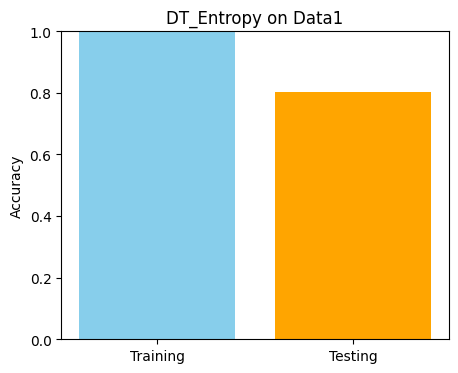

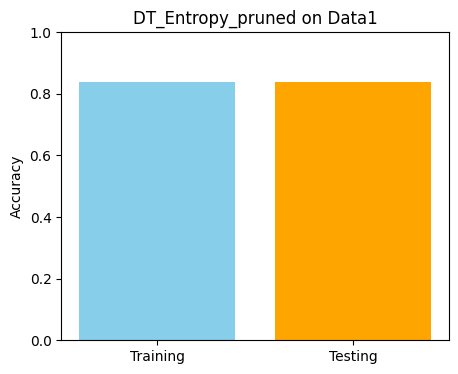

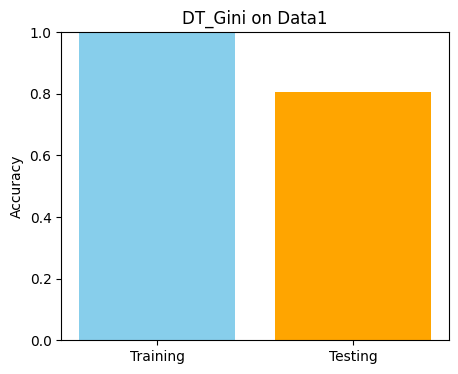

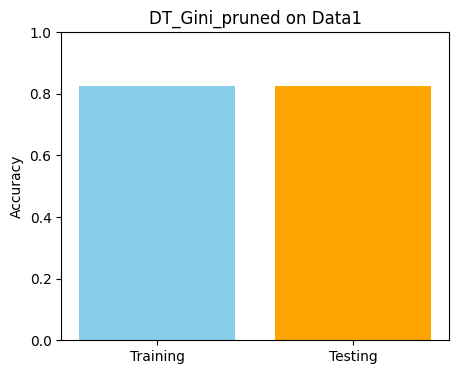

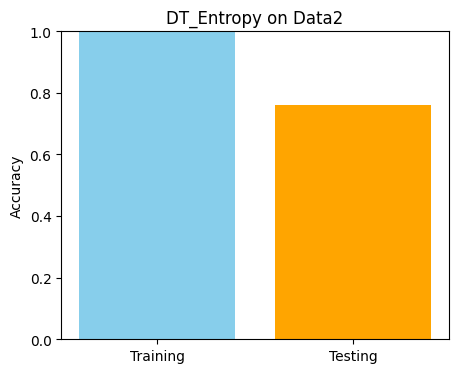

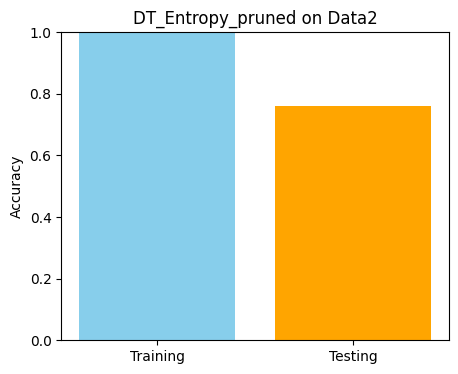

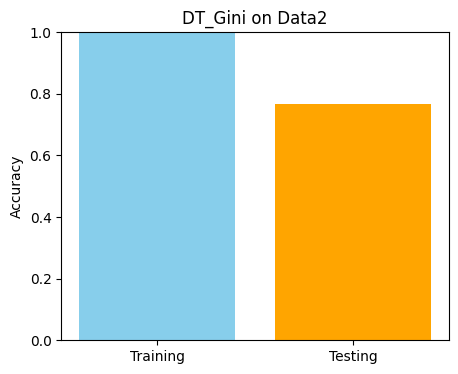

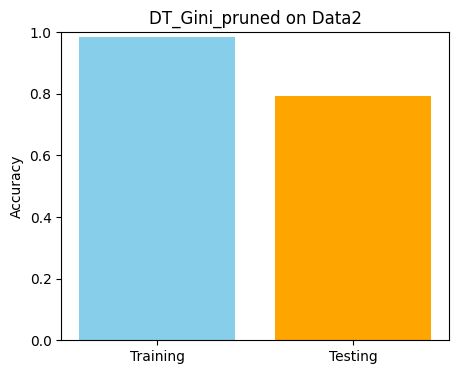

In [307]:
datasets = ["Data1", "Data2"]
methods = ["DT_Entropy", "DT_Entropy_pruned", "DT_Gini", "DT_Gini_pruned"]

for data in datasets:
    for method in methods:
        train_acc, test_acc = results[data][method]

        # Bar plot
        plt.figure(figsize=(5,4))
        plt.bar(["Training", "Testing"], [train_acc, test_acc], color=["skyblue","orange"])
        plt.ylim(0,1)
        plt.title(f"{method} on {data}")
        plt.ylabel("Accuracy")
        plt.show()

# Q2

In [308]:
df = pd.read_excel("../data/04/loan_approval_prediction.xlsx")

In [310]:
df.head()

,ID,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING,CLASS
0,1,Young,False,False,Fair,No
1,2,Young,False,False,Good,No
2,3,Young,True,False,Good,Yes
3,4,Young,True,True,Fair,Yes
4,5,Young,False,False,Fair,No


In [321]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = 0
    for i in range(len(elements)):
        prob = counts[i] / np.sum(counts)
        entropy -= prob * log2(prob)
    return entropy

In [322]:
# total - (prob of val1 * entropy(val1) + ....)

def info_gain(data, split_attribute, target_name="CLASS"):
    total_entropy = entropy(data[target_name])

    vals, counts = np.unique(data[split_attribute], return_counts=True)
    weighted_entropy = 0
    for i in range(len(vals)):
        subset = data[data[split_attribute] == vals[i]]
        prob = counts[i] / np.sum(counts)
        weighted_entropy += prob * entropy(subset[target_name])
    
    gain = total_entropy - weighted_entropy
    return gain

In [325]:
print("Entropy of CLASS: ", entropy(df["CLASS"]))
print()

cols = df.drop("CLASS", axis=1).columns

gains = {}
for col in cols:
    gains[col] = info_gain(df, col, target_name="CLASS")
    print(f"Information Gain for {col}: {gains[col]:.4f}")

root = max(gains, key=gains.get)
print("\nRoot Node: ", root)

Entropy of CLASS:  0.9709505944546686

Information Gain for ID: 0.9710
Information Gain for AGE: 0.0830
Information Gain for JOB_STATUS: 0.3237
Information Gain for OWNS_HOUSE: 0.4200
Information Gain for CREDIT_RATING: 0.3630

Root Node:  ID


# Q3

In [326]:
df = pd.read_csv("../data/04/cancer_patient_data_sets.csv")

In [327]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [330]:
df["Level"].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

##### Target column is balanced

In [331]:
cat_cols = df.select_dtypes(include="object").columns

cat_cols

Index(['Patient Id', 'Level'], dtype='object')

##### Ordinal Encoder for Level column because it has a clear order

In [335]:
ord_enc = OrdinalEncoder()
df["Level"] = ord_enc.fit_transform(df[["Level"]])

In [337]:
df.duplicated().sum()

np.int64(0)

In [338]:
df.drop("Patient Id", axis=1, inplace=True)

In [ ]:
correlations = df.corr(method='pearson')['Level'].drop('Level')
# print("Correlation of features with Level:\n", correlations, "\n")

selected_features = correlations[abs(correlations) > 0.2].index.tolist()
print("Selected features (based on correlation with target):", selected_features, "\n")

corr_matrix = df[selected_features].corr(method='pearson').abs()

# Choosing upper triangle matrix, cuz the corr matrix is symmetric
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [col for col in upper.columns if any(upper[col] > 0.85)]
print("Features dropped due to high multicollinearity:", to_drop, "\n")

final_features = [f for f in selected_features if f not in to_drop]
print("Final chosen features:", final_features)

Selected features (based on correlation with target): ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Dry Cough'] 

Features dropped due to high multicollinearity: ['OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease'] 

Final chosen features: ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Dry Cough']


##### We are doing a decision tree, trees dont require scaling of data

In [344]:
X = df.drop("Level", axis=1)
y = df["Level"]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=0)

##### We use validation set for tuning of the model. We might do feature selection and then see whether the performance improves

In [345]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_val_pred = dt.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_acc)

y_test_pred = dt.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Training Accuracy: ", dt.score(X_train, y_train))
print("Test Accuracy:", test_acc)

Validation Accuracy: 1.0
Training Accuracy:  1.0
Test Accuracy: 1.0


# Q4

In [4]:
df = pd.read_excel("../data/04/student_exp.xlsx")

In [5]:
df.head()

,Student,Prior Experience,Course,Time,Liked
0,1,Yes,Programming,Day,Yes
1,2,No,Programming,Day,No
2,3,Yes,History,Night,No
3,4,No,Programming,Night,Yes
4,5,Yes,English,Day,Yes


In [6]:
def gini_impurity(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    gini = 1
    for i in range(len(elements)):
        prob = counts[i] / np.sum(counts)
        gini -= prob ** 2
    return gini

In [7]:
def gini_index(data, split_attribute, target_name="Liked"):
    vals, counts = np.unique(data[split_attribute], return_counts=True)
    weighted_gini = 0
    for i in range(len(vals)):
        subset = data[data[split_attribute] == vals[i]]
        prob = counts[i] / np.sum(counts)
        weighted_gini += prob * gini_impurity(subset[target_name])
    return weighted_gini

In [9]:
print("Gini Impurity of target (Liked):", gini_impurity(df["Liked"]))
print()

cols = df.drop(columns=["Liked", "Student"]).columns

ginis = {}
for col in cols:
    ginis[col] = gini_index(df, col, target_name="Liked")
    print(f"Gini Index for {col}: {ginis[col]:.4f}")

root = min(ginis, key=ginis.get)
print("\nRoot Node: ", root)

Gini Impurity of target (Liked): 0.5

Gini Index for Prior Experience: 0.4762
Gini Index for Course: 0.3429
Gini Index for Time: 0.4800

Root Node:  Course
